# Logic Field Theory vs Standard Quantum Mechanics
## Weak Measurement Collapse Simulation (Fixed Parameters Version)

This notebook generates static, fixed-parameter plots comparing LFT vs QM predictions for different logical stiffness values (α).

We show the narrowing of outcome distributions as causal momentum strength increases.

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Define Parameters and Compute Distributions

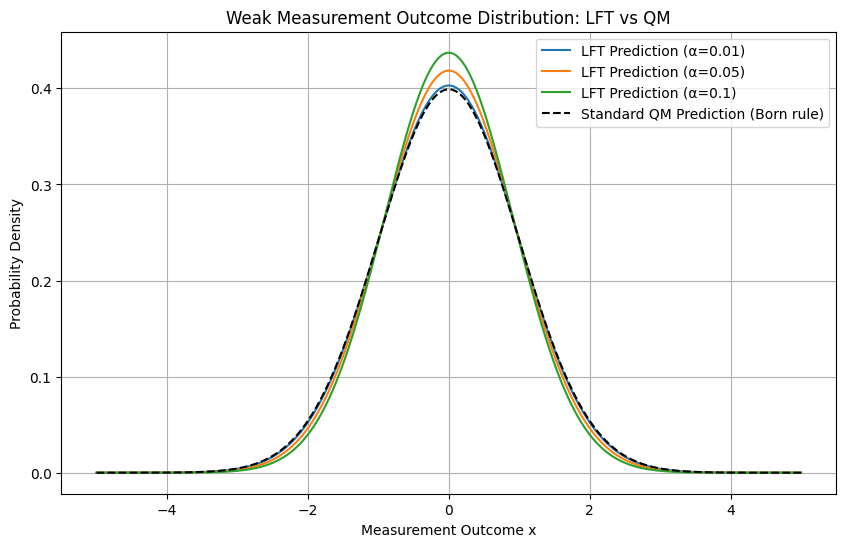

In [2]:
# Parameters
sigma_qm = 1.0
alphas = [0.01, 0.05, 0.1]  # Logical stiffness values
x = np.linspace(-5, 5, 1000)

# Standard QM Prediction (Gaussian)
P_qm = (1 / (np.sqrt(2 * np.pi) * sigma_qm)) * np.exp(-x**2 / (2 * sigma_qm**2))

# Precompute standard deviation for QM
std_qm = np.sqrt(np.trapezoid((x**2)*P_qm, x))

# Store results
results = []

# Plot setup
plt.figure(figsize=(10,6))

# Loop over different alphas
for alpha_lft in alphas:
    # Logical coherence filter
    logical_filter = np.exp(-alpha_lft * x**2)

    # Unnormalized LFT distribution
    P_lft_raw = P_qm * logical_filter

    # Normalize
    P_lft = P_lft_raw / np.trapezoid(P_lft_raw, x)

    # Calculate standard deviation
    std_lft = np.sqrt(np.trapezoid((x**2)*P_lft, x))

    # Save results
    results.append((alpha_lft, std_lft))

    # Plot
    plt.plot(x, P_lft, label=f'LFT Prediction (α={alpha_lft})')

# Plot QM baseline
plt.plot(x, P_qm, label='Standard QM Prediction (Born rule)', linestyle='--', color='black')

# Final plot settings
plt.title('Weak Measurement Outcome Distribution: LFT vs QM')
plt.xlabel('Measurement Outcome x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## 3. Compare Standard Deviations

In [3]:
print(f"Standard Deviation (QM): {std_qm:.4f}")
print()
print("LFT Predictions:")
for alpha_lft, std_lft in results:
    reduction = (1 - std_lft/std_qm)*100
    print(f"Alpha = {alpha_lft:.2f} | Std Dev = {std_lft:.4f} | Reduction = {reduction:.2f}%")

Standard Deviation (QM): 1.0000

LFT Predictions:
Alpha = 0.01 | Std Dev = 0.9901 | Reduction = 0.99%
Alpha = 0.05 | Std Dev = 0.9535 | Reduction = 4.65%
Alpha = 0.10 | Std Dev = 0.9129 | Reduction = 8.71%


## 4. Conclusion

- As the logical stiffness α increases, LFT predicts stronger narrowing of the weak measurement distribution.
- This reflects the strengthening effect of causal momentum on minimal logical transitions.
- Such measurable narrowing trends serve as experimental signatures of LFT dynamics compared to standard quantum mechanical predictions.